<a href="https://colab.research.google.com/github/szhou12/ml-practice/blob/main/pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[2-PyTorch框架发展趋势简介](https://www.bilibili.com/video/BV1o24y1n7Yp?p=3&vd_source=0c02ef6f6e7a2b0959d7dd28e9e49da4)
# Pytorch登场
Torch是什么？一个火炬！其实跟Tensorflow中的Tensor一个意思，当作是能在GPU计算的矩阵就可以啦。也可以当作是Numpy里ndarray的GPU版

[3-框架安装方法（CPU与GPU版本）](https://www.bilibili.com/video/BV1o24y1n7Yp?p=4&spm_id_from=pageDriver&vd_source=0c02ef6f6e7a2b0959d7dd28e9e49da4)
# 安装Pytorch: 使用 Pip 方法比较简单
CUDA means to install GPU version of Pytorch

In [ ]:
import torch
torch.__version__

'1.13.1+cu116'

[4-PyTorch基本操作简介](https://www.bilibili.com/video/BV1o24y1n7Yp?p=5&spm_id_from=pageDriver&vd_source=0c02ef6f6e7a2b0959d7dd28e9e49da4)
# 基本使用方法


创建一个矩阵

In [ ]:
x = torch.empty(5, 3)
x

tensor([[0.0000e+00, 5.6710e+13, 1.8788e+31],
        [1.7220e+22, 2.1715e-18, 8.3575e+20],
        [6.5987e-10, 4.1909e+21, 1.6985e-07],
        [4.2887e-08, 5.4212e-05, 1.0741e-05],
        [4.2465e-08, 2.6539e-09, 2.1707e-18]])

创建一个随机矩阵

In [ ]:
x = torch.rand(5, 3)
x

tensor([[0.7900, 0.7035, 0.9950],
        [0.3637, 0.4094, 0.2119],
        [0.1001, 0.6517, 0.3731],
        [0.6016, 0.4841, 0.4408],
        [0.5239, 0.7204, 0.7224]])

`tensor` object: 当作矩阵就行了，里面几维都行 (Pytorch tensor 直接理解成 numpy array就行)

**注意**: Pytorch中所有数据使用前都要转换为`tensor`格式, numpy array不可以. 

创建一个全零矩阵

In [ ]:
x = torch.zeros(5, 3, dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

直接传入数据

In [ ]:
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

感觉是不是跟Numpy差不多，其实这些框架的基本操作都大同小异

In [ ]:
x = x.new_ones(5, 3, dtype=torch.double)
print(x)
x = torch.randn_like(x, dtype=torch.float) # 构建与x维度一样的随机矩阵
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.3992, -0.0738,  0.3960],
        [ 0.3455,  1.6476,  0.0377],
        [ 0.1508,  0.4529,  0.0382],
        [-0.9399,  0.2198, -0.4374],
        [ 0.2875,  0.9777,  0.9671]])


**展示矩阵大小**

In [ ]:
x.size()

torch.Size([5, 3])

**基本计算方法**

In [ ]:
y = torch.rand(5,3)
x + y

tensor([[ 1.3340,  0.6843,  0.6170],
        [ 0.3719,  2.0622,  0.4047],
        [ 0.3785,  0.8783,  0.6388],
        [-0.1727,  0.7988, -0.0197],
        [ 1.0610,  1.7997,  1.0899]])

In [ ]:
torch.add(x, y) # 一样的也是矩阵的加法

tensor([[ 1.3340,  0.6843,  0.6170],
        [ 0.3719,  2.0622,  0.4047],
        [ 0.3785,  0.8783,  0.6388],
        [-0.1727,  0.7988, -0.0197],
        [ 1.0610,  1.7997,  1.0899]])

**索引/Indexing**

`:`表示取所有元素

`0, 1, 2, 3, 4, 5 ...`表示取具体哪个元素

In [ ]:
x[:, 1]

tensor([-0.0738,  1.6476,  0.4529,  0.2198,  0.9777])

**view()操作可以改变矩阵维度**

* 相当于Numpy中的 `reshape()`

In [ ]:
x = torch.randn(4, 4) # 4 x 4
y = x.view(16) # 压扁成一个维度16个元素. 就是一个长度为16的list
z = x.view(-1, 8) # -1 自动计算维度，第二个维度有8个元素；所以，第一个维度自动算作有2个元素
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


**与Numpy的协同操作**

In [ ]:
a = torch.ones(5)
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

[自动求导机制](https://www.bilibili.com/video/BV1o24y1n7Yp?p=6&spm_id_from=pageDriver&vd_source=0c02ef6f6e7a2b0959d7dd28e9e49da4)
# 自动求导机制/Autograd机制
* Pytorch框架干的最厉害的一件事就是帮我们把Backprop全部计算好了
* Autograd机制简单理解: 任何一个我搭建的模型, 只要继承了`nn.Module`并实现了`forward()`, Autograd机制就可以自动帮我布置Backprop一系列要做的事情

需要求导的，可以手动定义：

`requires_grad=True` 意思是接下来在training过程中，可以对x进行求导了

In [ ]:
# 方法一(推荐): 
x = torch.randn(3, 4, requires_grad=True)
x

tensor([[-0.7611, -2.2787,  0.4267,  0.1446],
        [-0.4557,  1.7719, -2.2767,  0.3478],
        [ 0.7959,  2.2099, -0.5382,  1.4085]], requires_grad=True)

In [ ]:
# 方法二:
x = torch.randn(3, 4)
x.requires_grad = True
x

tensor([[ 0.2037,  0.8724,  0.0100, -0.5068],
        [ 0.1735, -0.3900, -0.4218, -0.1774],
        [ 1.3312,  2.0244, -0.5548, -0.8270]], requires_grad=True)

**一个小🌰**

In [ ]:
b = torch.randn(3, 4, requires_grad = True)

$t = f(x, b) = x + b$

In [ ]:
t = x + b # 注意: t没有设定requires_grad=True, 按照默认值处理应该为False, 即, 不是可求导的变量

$y = f(t) = \sum_i{t_i}$

In [ ]:
y = t.sum()
y

tensor(-1.2870, grad_fn=<SumBackward0>)

In [ ]:
y.backward() # 对y执行Backprop: backward()会把y涉及的变量自动转化为可求导的变量, 此时, t有了设定requires_grad=True

$\partial b = \frac{\partial y}{\partial t} \cdot \frac{\partial t}{\partial b}$

In [ ]:
b.grad # 检查b的梯度

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

虽然没有指定`t`的requires_grad, 但是backward()会用到`t`, 会默认指定requires_grad=True

In [ ]:
x.requires_grad, b.requires_grad, t.requires_grad

(True, True, True)

**举个例子看一下:**

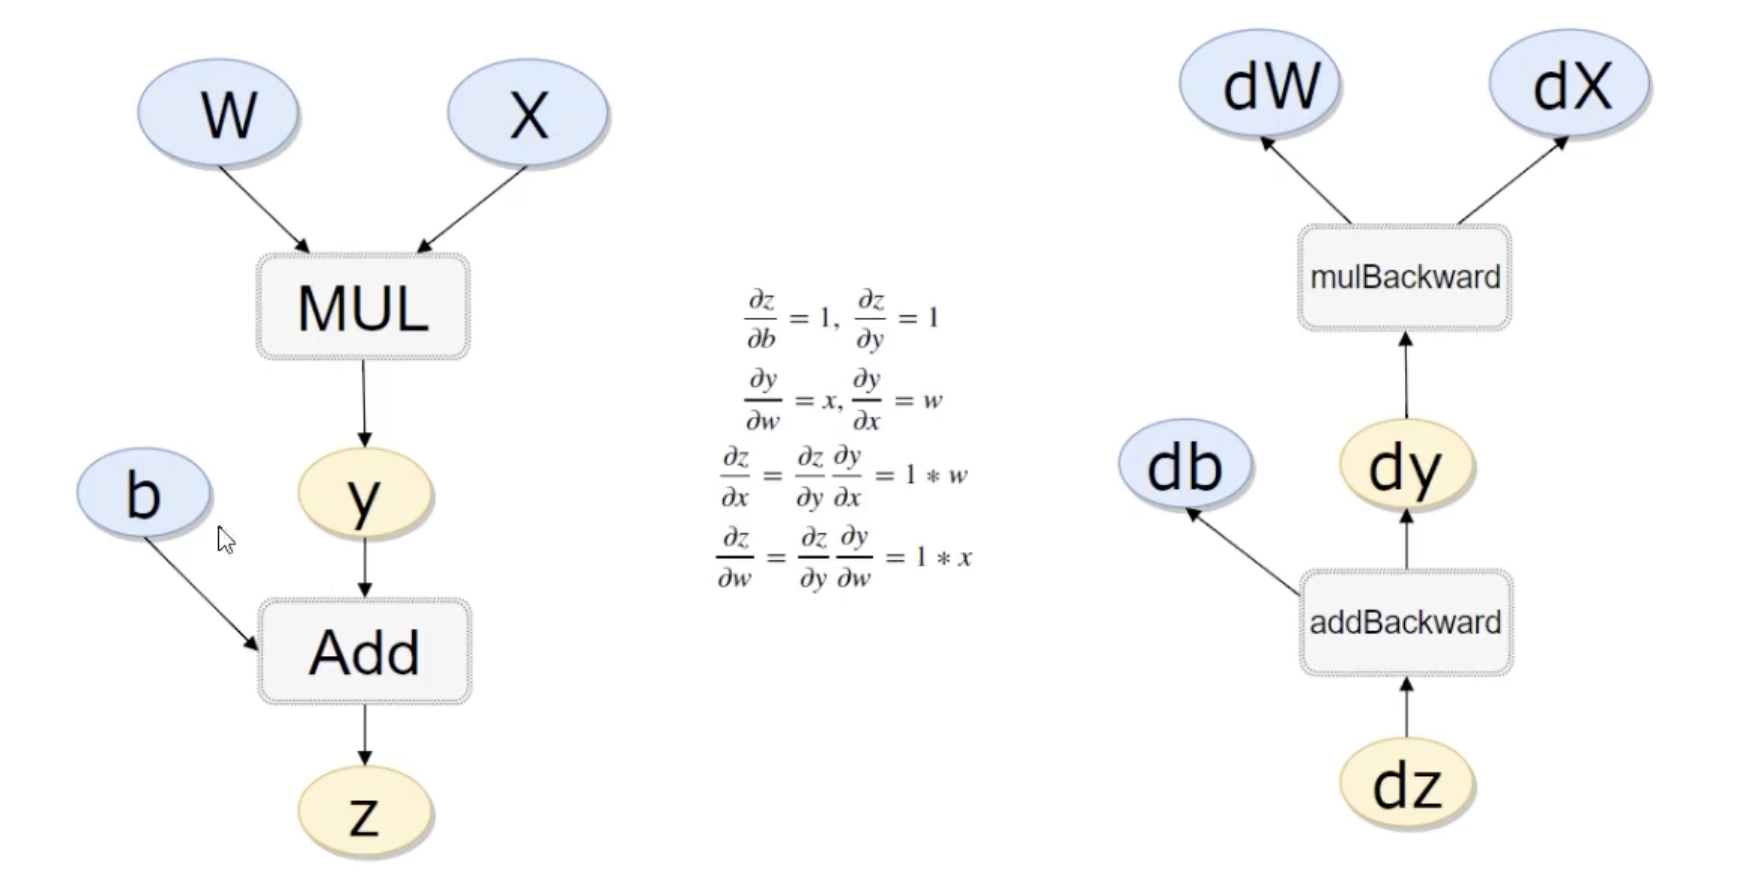

$y = x\cdot w$

$z = b + y$

In [ ]:
# 计算流程
x = torch.rand(1)
b = torch.rand(1, requires_grad=True)
w = torch.rand(1, requires_grad=True)
y = x * w
z = b + y

In [ ]:
x.requires_grad, b.requires_grad, w.requires_grad, y.requires_grad #注意y也是需要指定可求导的, 因为w可求导且w的结果依赖于y求导的结果

(False, True, True, True)

In [ ]:
# 哪些是叶子节点
x.is_leaf, w.is_leaf, b.is_leaf, y.is_leaf, z.is_leaf

(True, True, True, False, False)

反向传播计算

`retain_graph=True` 意思是说`backward()`可以反复执行, 当`backward()`重复执行时, gradient的值会累加起来

实验: 当反复执行 `z.backward(retain_graph=True)`, 会发现 `b.grad`会不停+1

实际过程中，每一轮反向传播计算的步骤: 清零之前的梯度 $⇒$ 再计算梯度 $⇒$ 再更新参数

Resource: [pytorch 中retain_graph==True的作用](https://zhuanlan.zhihu.com/p/475780204)

In [ ]:
# 这里反向传播计算梯度时没有清零, 如果不清空会把gradient累加起来
z.backward(retain_graph=True)

In [ ]:
# dz/dw = dz/dy*dy/dw = 1*x
print(f'w gradient={w.grad} vs x value={x}')

w gradient=tensor([1.0711]) vs x value=tensor([0.5355])


In [ ]:
# dz/db = 1
b.grad

tensor([2.])

[线性回归DEMO-数据与参数配置](https://www.bilibili.com/video/BV1o24y1n7Yp?p=7&spm_id_from=pageDriver&vd_source=0c02ef6f6e7a2b0959d7dd28e9e49da4)
# 做一个线性回归试试水
构造一组输入数据X和其对应的标签y

In [1]:
import numpy as np
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [2]:
y_values = [2*i+1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

**线性回归模型**
* 线性回归其实就是一个不加激活函数的全连接层

In [3]:
import torch
import torch.nn as nn # torch的nn模块

* 无论要写多么复杂的模型，第一步都是先把它的类定义出来
* 此处的`LinearRegressionModel`类 继承 torch nn模块中的Module模块。Module模块的意思是里面有很多已经实现好的接口, 我们只需要去写我们自己的线性回归模型中用哪些层就行了, 其他的任务统统由torch负责
* constructor`__init__()`里declare你的模型要用的层 (例如下面的例子就用到了一个线性层)
* 实现前向传播`forward()`: 告诉pytorch怎么用你声明的层

**Resources**: 
* [Pytorch 03: nn.Module模块了解](https://blog.csdn.net/u012609509/article/details/81203436)
    * 定义自己的网络需要牢记的一些原则
        * **继承 `nn.Module` 类，并且实现`forward()` 方法**
        * 一般把网络中具**有可学习参数的层**放在构造函数`__init__()`中
        * 不具有可学习参数的层(eg. Relu)可放在构造函数中，也可以不放在构造函数中(而在`forward()`中使用`nn.functional`来替代)
        * 只要`nn.Module`的子类中定义了`forward()`, `backward()`就会被自动实现(利用Autograd)
        * 在`forward()`中可以使用任何Variable支持的函数，毕竟在整个pytorch构建的图中，是Variable在流动。还可以使用 `if`, `for`, `print`, `log`等Python语法
* [Pytorch 01: Tensor的了解](https://blog.csdn.net/u012609509/article/details/81203308), [Pytorch 02: Variable的了解](https://blog.csdn.net/u012609509/article/details/81203376), [Pytorch的Variable详解](https://blog.csdn.net/Mr_zhuo_/article/details/108132061)
    * `Tensor` vs `Variable`
        * 两者都是Pytorch中的类
        * `Variable`是Pytorch中autograd模块的核心
        * `Variable` 封装了 `Tensor`
        * `Variable`包含3个属性:
            1. data: 保存`Vairiable`中所包含的`Tensor`
            2. grad: 保存data对应的梯度, grad也是一个`Variable`, 而不是`Tensor`, 形状与data一致
            3. grad_fn: 指向一个Function对象, 这个Function用来计算反向传播计算输入的梯度
    * A PyTorch Variable is a wrapper around a PyTorch Tensor, and represents a node in a computational graph. If x is a Variable then x.data is a Tensor giving its value, and x.grad is another Variable holding the gradient of x with respect to some scalar value. [PyTorch: Variables and autograd](https://sebarnold.net/tutorials/beginner/examples_autograd/two_layer_net_autograd.html)

In [4]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        # nn.Module的子类函数必须在构造函数中执行父类的构造函数
        super(LinearRegressionModel, self).__init__() # 等价于 nn.Module.__init__()

        self.linear = nn.Linear(input_dim, output_dim) # 声明一个线性层(即，全连接层), 它具有可学习参数 w, b，所以放在构造函数里
    
    def forward(self, x):
        out = self.linear(x)
        # 返回值是一个Variable对象
        return out

In [5]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [6]:
# 打印model瞅一眼
# 按照网络从前到后怎么走的打印每一层
model

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

**指定参数和损失函数**:
1. 确定训练次数 (一共迭代多少次) -- epochs
2. 确定学习率 -- learning_rate
3. 指定好一个优化器 -- optimizer
    * 需要告诉优化器你要优化什么东西 (e.g. 模型中用到的参数`model.parameters()`)
    * 这里选择 SGD优化器
4. 定义损失函数
    * 分类任务: cross-entropy
    * 回归任务: MSE (常规)

In [7]:
epochs = 1000
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # 优化model中但凡用到的参数
criterion = nn.MSELoss()

[线性回归DEMO-训练回归模型](https://www.bilibili.com/video/BV1o24y1n7Yp?p=8&spm_id_from=pageDriver&vd_source=0c02ef6f6e7a2b0959d7dd28e9e49da4)

训练模型

**Resources**:
* [Why do we need to call zero_grad() in PyTorch?](https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)

In [8]:
for epoch in range(epochs):
    epoch += 1

    # 注意把numpy格式转换成pytorch tensor格式
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)

    # 每一次迭代epoch, 在优化器里, 清零梯度!!! 清零梯度!!! 清零梯度!!!
    # 相当于上一次迭代epoch计算的梯度, 在本轮中已经不需要
    optimizer.zero_grad()

    # 前向传播
    # 注: 这里应该是直接call forward()
    outputs = model(inputs)

    # 计算损失
    loss = criterion(outputs, labels)

    # 反向传播
    # 这里只是求出参数的梯度, 并未对参数进行更新
    loss.backward()

    # 更新权重参数
    optimizer.step() # 基于lr和梯度值, 进行一次参数的更新
    
    if epoch % 50 == 0:
        print(f'epoch {epoch}, loss {loss.item()}')

epoch 50, loss 0.39102116227149963
epoch 100, loss 0.2230236530303955
epoch 150, loss 0.12720443308353424
epoch 200, loss 0.0725526362657547
epoch 250, loss 0.04138120263814926
epoch 300, loss 0.023602301254868507
epoch 350, loss 0.013461899943649769
epoch 400, loss 0.0076781585812568665
epoch 450, loss 0.004379320424050093
epoch 500, loss 0.0024977969005703926
epoch 550, loss 0.0014246441423892975
epoch 600, loss 0.0008125556632876396
epoch 650, loss 0.00046345291775651276
epoch 700, loss 0.00026433661696501076
epoch 750, loss 0.0001507611887063831
epoch 800, loss 8.599178545409814e-05
epoch 850, loss 4.904666275251657e-05
epoch 900, loss 2.7975887860520743e-05
epoch 950, loss 1.5953761248965748e-05
epoch 1000, loss 9.098830560105853e-06


**测试模型预测结果**

In [9]:
# torch.from_numpy(x_train) 把numpy转换成tensor
# torch.from_numpy(x_train).requires_grad_() 相当于requires_grad=True 
#    (实验下来, 不加.requires_grad_()也可以跑, 因为它只是让tensor可以求导, 前向传播不涉及求导, 所以加不加没影响)
# model(torch.from_numpy(x_train).requires_grad_()) 进行一次前向传播
# model(...).data 取出前向传播的结果
# model(...).data.mumpy() 把结果从tensor转换成numpy
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.99438846],
       [ 2.9951968 ],
       [ 4.996005  ],
       [ 6.9968133 ],
       [ 8.997622  ],
       [10.99843   ],
       [12.999238  ],
       [15.000046  ],
       [17.000854  ],
       [19.001663  ],
       [21.002472  ]], dtype=float32)

**补充小知识**: `requires_grad_()`

Resources: 
* [requires_grad_()](https://pytorch.org/docs/stable/generated/torch.Tensor.requires_grad_.html)
    * `requires_grad_()`’s main use case is to tell autograd to begin recording operations on a Tensor
    * 主要应用场景是告诉自动求导机制开始记录追踪这个张量tensor的运算操作，默认值是True
* [Pytorch中requires_grad_(), detach(), torch.no_grad()的区别](https://cloud.tencent.com/developer/article/1637708)
    * `requires_grad_()`函数会改变`Tensor`的`requires_grad`属性并返回`Tensor`，修改`requires_grad`的操作是原位操作(in place)。其默认参数为`requires_grad=True`。`requires_grad=True`时，自动求导会记录对`Tensor`的操作，`requires_grad_()`的主要用途是告诉自动求导开始记录对`Tensor`的操作。

In [10]:
x = torch.from_numpy(x_train) # some tensor
print(x.requires_grad) # False. 
out = x.pow(2).sum()
# out.backward() # we CANNOT call out.backward()

# Now, start to record operations done to x
x = torch.from_numpy(x_train).requires_grad_()
print(x.requires_grad) # True. 
out = x.pow(2).sum()
out.backward() # Now, we CAN call out.backward()

False
True


**模型的保存与读取**

In [11]:
# model.state_dict() 是model的权重参数w, b
torch.save(model.state_dict(), "model.pkl")

In [12]:
model.load_state_dict(torch.load("model.pkl"))

<All keys matched successfully>

# 使用GPU进行训练
* 只需要把**data**和**model**传入到cuda里面就可以了
    * `model.to(device)`
    * `data.to(device)`

In [5]:
import torch
import torch.nn as nn
import numpy as np

x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*x+1 for x in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)


class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()

        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

## 指定pytorch运行的设备. 如果cuda设置好了，使用cuda；否则，使用cpu
## 注意: 使用Google Colab时要先把Runtime改成GPU, 下面的指令才有用 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(torch.cuda.is_available())
# print(device)

## 把模型model传入到cuda里
model.to(device)

epochs = 1000
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # 优化model中但凡用到的参数
criterion = nn.MSELoss()

for epoch in range(epochs):
    epoch += 1

    ## 把数据data传入到cuda里
    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)

    # 清零梯度
    optimizer.zero_grad()

    # 前向传播
    outputs = model(inputs)

    # 计算损失
    loss = criterion(outputs, labels)

    # 反向传播
    loss.backward()

    # 更新权重参数
    optimizer.step()
    
    if epoch % 50 == 0:
        print(f'epoch {epoch}, loss {loss.item()}')

epoch 50, loss 0.41396960616111755
epoch 100, loss 0.2361128330230713
epoch 150, loss 0.1346699595451355
epoch 200, loss 0.07681072503328323
epoch 250, loss 0.0438099205493927
epoch 300, loss 0.02498752996325493
epoch 350, loss 0.014251958578824997
epoch 400, loss 0.008128796704113483
epoch 450, loss 0.004636354744434357
epoch 500, loss 0.0026443898677825928
epoch 550, loss 0.001508270506747067
epoch 600, loss 0.0008602499729022384
epoch 650, loss 0.0004906599642708898
epoch 700, loss 0.000279854575637728
epoch 750, loss 0.00015961950703058392
epoch 800, loss 9.104116907110438e-05
epoch 850, loss 5.1926606829511e-05
epoch 900, loss 2.961798236356117e-05
epoch 950, loss 1.689205237198621e-05
epoch 1000, loss 9.634741218178533e-06


[常见tensor格式](https://www.bilibili.com/video/BV1o24y1n7Yp?p=9&spm_id_from=pageDriver&vd_source=0c02ef6f6e7a2b0959d7dd28e9e49da4)
# 常见tensor格式